# Session 12: Problem Solving with Simulation

## Performance Comparisons

In [1]:
from scipy.stats import binom
import numpy as np
%timeit binom(100000,0.05).rvs()

516 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [2]:
dist=binom(100000,0.05)
%timeit dist.rvs()

33.8 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
%timeit np.random.binomial(100000,0.05)

1.26 µs ± 27.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Q1. Forecasting the Spread of a New Virus
A new virus has broken out in a city and has an incubation period of $d=14$ days. Starting from $a=2$ days after infection to the last day of the incubation period, each infected patient has close contact with $n=6$ uninfected people, and infects each of them with probability $p=0.05$ independently from others. At the end of the last day of incubation, each infected person reports to the hospital and enters isolation, which means that they stop infecting others. Suppose that there is exactly 1 infected person on Day 0, create a function that simulates the number of patients who report to the hospital at the end of Day 1 through Day $m$. 

The function should be called `simulateNewCases` and has the following arguments:

- `m`: the number of days to simulate.
- `a` (default value 2): the minimum day after infection when a patient becomes contagious.
- `d` (default value 14): the day after infection in which symptoms begin.
- `n` (default value 6): the number of uninfected individuals a person contacts each day.
- `p` (default value 0.05): the probability of infecting a close contact each day. 

The function should return a list of $m$ integers, representing the number of infected individuals who exit incubation and report to the hospital at the end of Day 1 through Day $m$. 

To illustrate the timeline. Suppose that a person is infected on Day 5, then the person becomes contagious on Day $5+a=7$ and starting on that day, has the capacity to infect up to $n$ people per day. At the end Day $5+d=19$, after possibly infecting new people on that day, the patient reports to the hospital and enters into isolation.

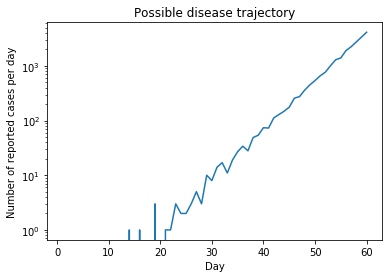

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
m=60
s=pd.Series(simulateNewCases(m),index=range(1,m+1))
plt.xlabel('Day')
plt.ylabel('Number of reported cases per day')
plt.title('Possible disease trajectory')
s.plot(logy=True)

In [6]:
total=pd.Series([sum(simulateNewCases(60)) for i in range(1000)])

In [7]:
print('Number of total cases in 60 days.')
print(f'  Forecast mean: {total.mean():.0f}')
print(f'  Forecast standard deviation: {total.std():.0f}')

Number of total cases in 60 days.
  Forecast mean: 11720
  Forecast standard deviation: 9101


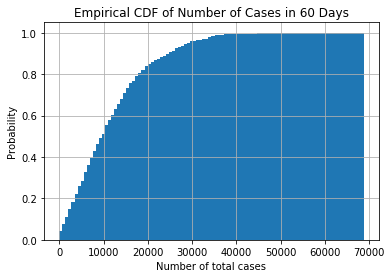

In [8]:
plt.xlabel('Number of total cases')
plt.ylabel('Probability')
plt.title('Empirical CDF of Number of Cases in 60 Days')
total.hist(bins=100,density=True,cumulative=True)

## Q2. Discussion

**a)** What other interesting questions might be answered using the simulation model in Q1?

**b)** Pick one or more questions from part a), what would be your analysis plan for studying this question? 

## Q3. Self-Directed Exploration

Implement on or more of your analysis plans from Q2.